# Olympics Exploratory Data Analysis Project

The datasets were downloaded from Kaggle: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

We are performing exploratroy data analysis on this dataset to better understand the 120 year Olympic history.

In [1]:
# import relevant data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load datasets
athletes = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
# view the head of athletes dataset
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# view the head of the regions dataset
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# Check the most popular teams 
athletes['Team'].value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Laurea-1             1
Baby-9               1
Rostock              1
Mythilus             1
Lancet               1
Name: Team, Length: 1184, dtype: int64

As we can see there are many 'teams' which don't correlate to a country, therefore we must merge these two datasets on the NOC column to get the actual country region for each row

In [6]:
# Merge the two tables together to get actual country names for each NOC
athletes_df = athletes.merge(region, how='left', on='NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
# Check the shape of the athletes dataframe
athletes_df.shape

(271116, 17)

In [8]:
# Rename the new columns
athletes_df.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace=True)

In [9]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
# We can use this command to check for basic info on the dataset such as the data type for each column
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [12]:
# This command gives basic statiscial information for the numerical column
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [21]:
# Check the null values
nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [25]:
# Check the number of null values in each column
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [14]:
# There are two methods to query the data, the first example is shown here
athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
# This is the second method to query the data
athletes_df[athletes_df['Team'] == 'India'].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [16]:
athletes_df[athletes_df['Team'] == 'Japan'].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [17]:
athletes_df.query('Team == "Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [18]:
# Check once again the most popular teams
athletes_df['Team'].value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Laurea-1             1
Baby-9               1
Rostock              1
Mythilus             1
Lancet               1
Name: Team, Length: 1184, dtype: int64

In [19]:
# Print the top 10 countries with the most participation
top_10_countries = athletes_df['Team'].value_counts().head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Participation by Country'}, ylabel='Team'>

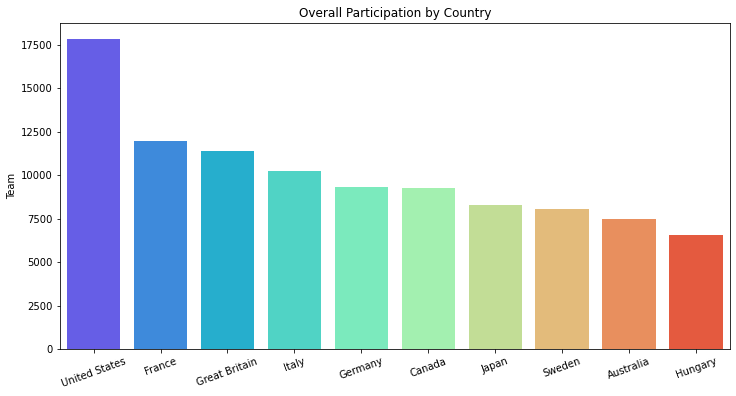

In [20]:
# Overall participation of countries plot
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='rainbow')


<AxesSubplot:title={'center':'Age distribution of the athletes'}, xlabel='Age', ylabel='Number of Participants'>

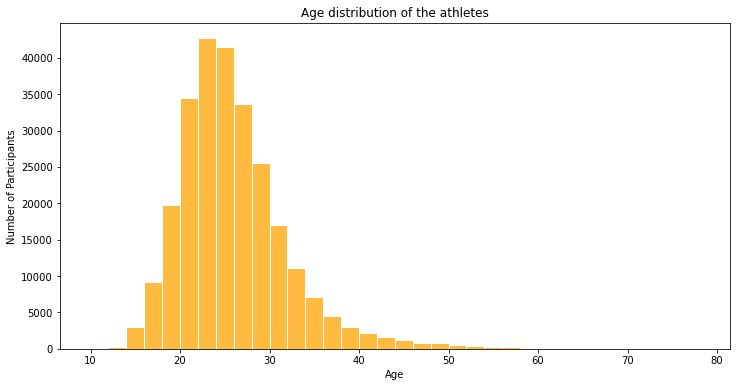

In [23]:
# Age distribution of the participants
plt.figure(figsize=(12, 6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
sns.histplot(athletes_df['Age'], bins=np.arange(10, 80, 2), color='orange', edgecolor='white')

In [24]:
# Check the oldest athlete in the Olympics
athletes_df[athletes_df['Age'] == athletes_df['Age'].max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


In [25]:
# we can check the unique sports in the winter Olympics
winter_sports = athletes_df[athletes_df['Season'] == 'Winter']['Sport'].unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [26]:
# Similarly we can check the uniqie sports in the Summer Olympics
summer_sports = athletes_df[athletes_df['Season'] == 'Summer']['Sport'].unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [27]:
#Male and Female participants
gender_counts = athletes_df['Sex'].value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x29c092e30d0>,
 [Text(-0.3667682369230217, -1.0370540296360544, 'M'),
  Text(0.36676833401902587, 1.0370539952967293, 'F')],
 [Text(-0.20005540195801183, -0.5656658343469386, '72.5%'),
  Text(0.20005545491946863, 0.5656658156163977, '27.5%')])

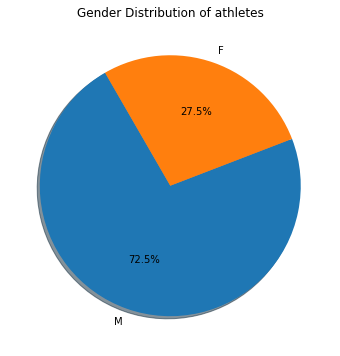

In [28]:
# Pie chart for male and female athletes distribution
plt.figure(figsize=(12, 6))
plt.title('Gender Distribution of athletes')
plt.pie(gender_counts, shadow=True, labels=gender_counts.index, startangle=120, autopct='%1.1f%%')

In [29]:
# Total Medals
athletes_df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [30]:
# Total Number of female participants at each summer Olympics
female_participants = athletes_df[(athletes_df['Sex'] == 'F') & (athletes_df['Season'] == 'Summer')][['Sex','Year']]
female_participants = female_participants.groupby(by='Year').count().reset_index()
female_participants.columns = ['Year', 'Count']

female_participants

,Year,Count
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


<AxesSubplot:xlabel='Year', ylabel='count'>

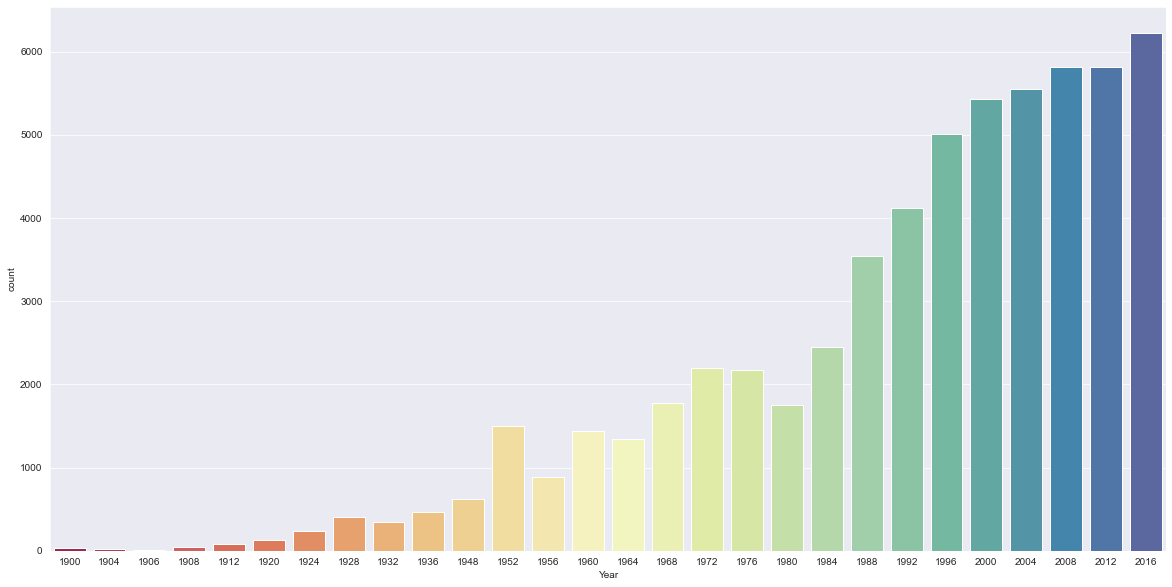

In [31]:
# Create a coutlplot to visulaise data of female participation across the Olympics
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=athletes_df[(athletes_df['Sex'] == 'F') & (athletes_df['Season'] == 'Summer')][['Sex','Year']], palette='Spectral')

<AxesSubplot:title={'center':'Plot of Female Participation over Time'}, xlabel='Year', ylabel='Count'>

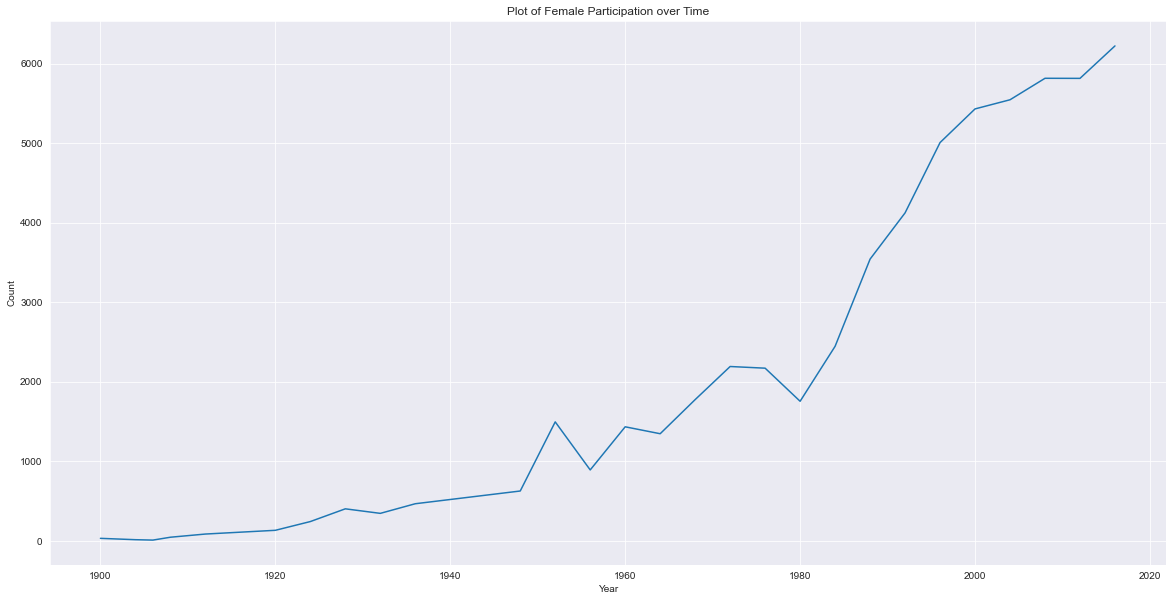

In [32]:
# Create a lineplot to visualise the data in a slighlty different way
plt.figure(figsize=(20, 10))
plt.title('Plot of Female Participation over Time')
sns.lineplot(data=female_participants, x='Year', y='Count')

In [33]:
# Gold Medal Athletes
gold_medals = athletes_df[athletes_df['Medal'] == 'Gold']
gold_medals.shape

(13372, 17)

In [34]:
# only use data where age value is available, np.finite returns true when the value in the row is not null
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]
gold_medals.shape

(13224, 17)

In [35]:
# Gold medals above the age of 60
gold_medals[gold_medals['Age'] >= 60]['ID'].count()

10

In [36]:
# Sporting events for athletes that achieved gold medal above age of 60
sporting_events = gold_medals[gold_medals['Age'] >= 60]['Sport']
sporting_events

104003    Art Competitions
105199               Roque
159298            Shooting
190952             Archery
226374             Archery
233386            Shooting
233387            Shooting
233390            Shooting
261102             Archery
261675    Art Competitions
Name: Sport, dtype: object

C:\Users\Veer Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold medal for Athletes that are over the age of 60')

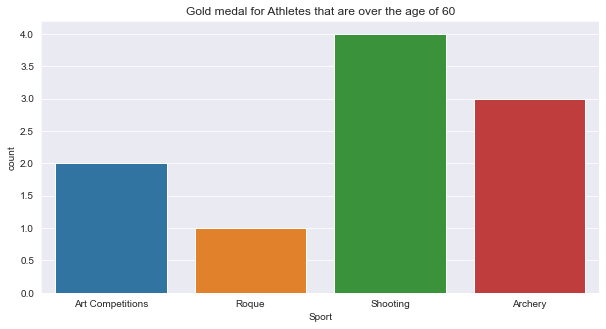

In [37]:
#Countplt for each sporting event where an over 60 athlete won
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_events)
plt.title('Gold medal for Athletes that are over the age of 60')

In [38]:
# View the top 10 countries with the highest medal count
gold_medals_country = gold_medals['Region'].value_counts().reset_index(name='Number of Medals').head(10)
gold_medals_country

,index,Number of Medals
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Number of Medals per country')

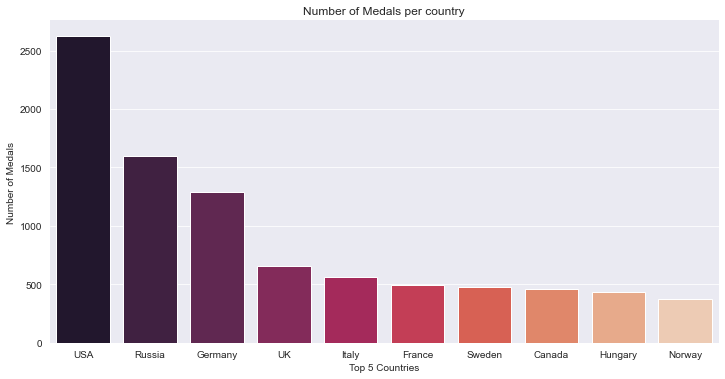

In [39]:
# Produce a barplot using catplot to visualise the medal data
g = sns.catplot(x='index', y='Number of Medals', data=gold_medals_country, kind='bar', palette='rocket', height=5, aspect=2)
g.despine(left=True)
plt.xlabel('Top 5 Countries')
plt.ylabel('Number of Medals')
plt.title('Number of Medals per country')

## Rio Olympics Data Analysis

In [40]:
max_year = athletes_df[athletes_df['Year'] == athletes_df['Year'].max()]
max_year.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN


In [41]:
# Most number of gold medals in Rio Olympics
max_year[max_year['Medal'] == 'Gold'].groupby('Name')['ID'].count().sort_values(ascending=False).head(15)

Name
Michael Fred Phelps, II               5
Simone Arianne Biles                  4
Kathleen Genevieve "Katie" Ledecky    4
Usain St. Leo Bolt                    3
Katinka Hossz                         3
Jason Francis Kenny                   3
Ryan Murphy                           3
Danuta Kozk                           3
Tianna Madison-Bartoletta             2
Nataliya Sergeyevna Ishchenko         2
Anthony Lee Ervin                     2
Sebastian Brendel                     2
Mohamed Muktar Jama "Mo" Farah        2
Nathan Ghar-Jun Adrian                2
Niccol Campriani                      2
Name: ID, dtype: int64

In [42]:
# Teams with the highest number of gold medals
team_names = athletes_df[(athletes_df['Year'] == athletes_df['Year'].max()) & (athletes_df['Medal'] == 'Gold')]
team_names['Region'].value_counts().head()

USA        139
UK          64
Russia      52
Germany     49
China       46
Name: Region, dtype: int64

The reason why USA medal count is so high is because this includes every athlete in a team sport as an individual medal

Text(0.5, 0, 'Countrywise Medals for Rio Olympics')

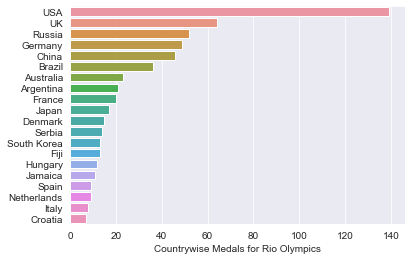

In [43]:
# Create a barplot which visualises the number of gold medals per country in the Olympics
sns.barplot(x=team_names['Region'].value_counts().head(20), y=team_names['Region'].value_counts().head(20).index)
plt.xlabel('Countrywise Medals for Rio Olympics')

In [44]:
#Plot height vs Weight of Olympic medallists, making sure to only include the athletes which have their height 
#and weight in the dataset
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())
                              & (athletes_df['Medal'].notnull())]

# Check that there are no more null values in these columns
not_null_medals.isnull()['Weight'].sum()

0

Text(0.5, 1.0, 'Height vs Weight of Olympic Medallists')

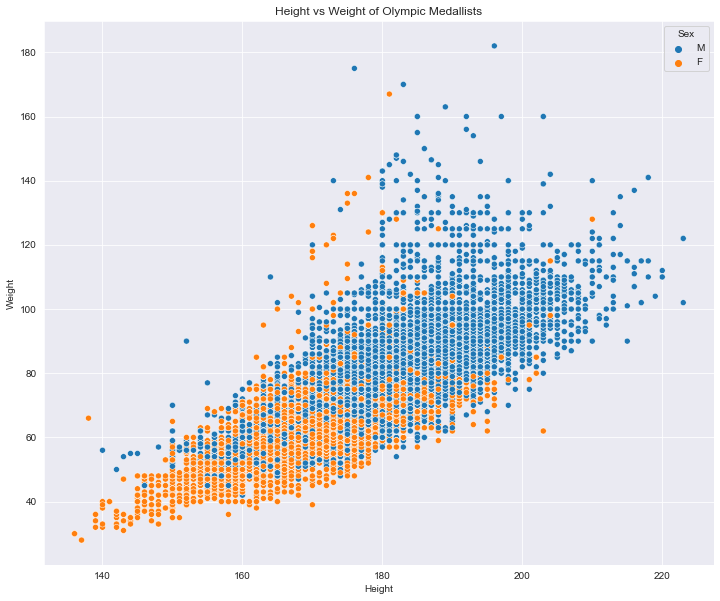

In [45]:
# Produce a scatterplot and visualise between male and female
plt.figure(figsize=(12, 10))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of Olympic Medallists')

In [46]:
# Check the total number of medals awarded
athletes_df['Medal'].notnull().sum()

39783